In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
pd.options.display.max_columns = 100

In [2]:
data = pd.read_csv("AmesHousing.tsv", delimiter ="\t")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
def transform_features(df:pd.DataFrame) -> pd.DataFrame:
    #drop if NaN more than 5%

    null_data = df.isnull().sum()
    drop_morethan_5 = null_data[null_data > len(df)/20]
    df.drop(drop_morethan_5.index, axis=1, inplace=True)

    #drop text Nan
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)

    
    #replace missing numeric values with max val of column
    df_numeric = df.select_dtypes(include=['integer', 'float'])
    
    for col in df_numeric.columns:
        df[col] = df.loc[:,col].fillna(df_numeric[col].value_counts().idxmax())
    df["Years Before Sale"] = df["Yr Sold"] - df["Year Built"]
    df["Years before Remod"] = - df["Yr Sold"] - df["Year Remod/Add"] 
    return df

def select_features(df:pd.DataFrame) -> pd.DataFrame:
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df:pd.DataFrame) -> float:
    train = df[:1460]
    test = df[1460:]
    num_train = train.select_dtypes(include=['integer', 'float'])
    num_test = test.select_dtypes(include=['integer', 'float'])
    
    target = "SalePrice"
    features = num_train.columns.drop("SalePrice")
    
    lr= LinearRegression()
    lr.fit(train[features], train[target])
    predictions = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test[target], predictions))
    return rmse
rmse = train_and_test(select_features(transform_features(data)))

In [4]:
td = transform_features(data)
td = td[1:].select_dtypes(include=['int', 'float'])
print("number of left errors: ", sum(td.isnull().sum()))
td.head()


number of left errors:  0


,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Years Before Sale,Years before Remod
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,49,-3971
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,52,-3968
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,42,-3978
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,13,-4008
5,6,527105030,60,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,6,2010,195500,12,-4008


#### Feature selection. Looking for a noizy columns.
As we can see Order and PID columns are noizy.
Order just another copy of pandas indexes. PID - is useless IDs.

Correlation heatmap

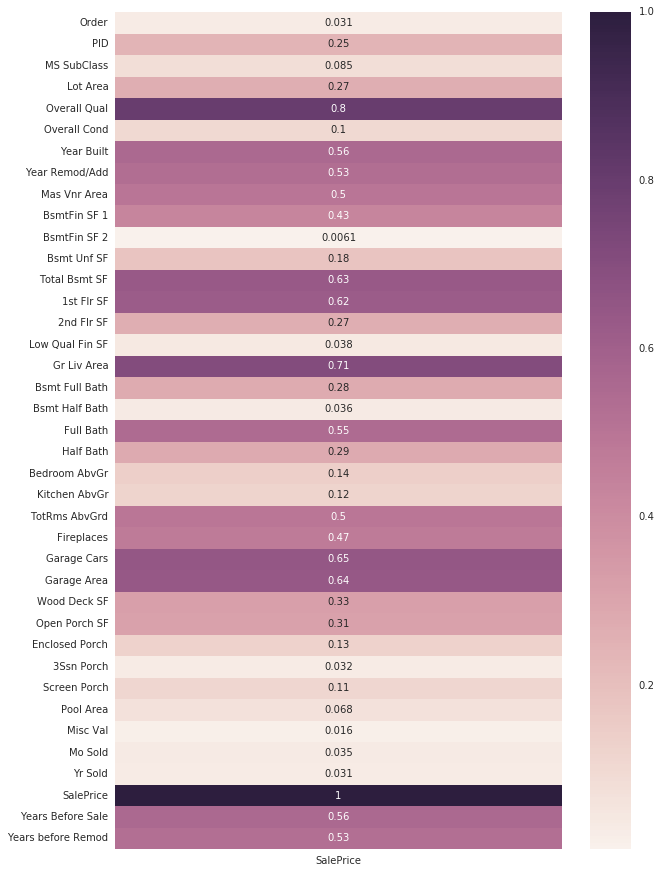

In [5]:
td_corr = td.corr().loc[:,["SalePrice"]].abs()
fig, ax = plt.subplots(figsize=(10,15)) 
sns.heatmap(td_corr, annot=True, ax=ax)

As we can see Garden living area, Overall quallity does best correlation results. 
If we want to do more research we would add  others  with   range ~ 0.9- 0.4 of corr coef.

In [6]:
def transform_features(df:pd.DataFrame) -> pd.DataFrame:
    
    #drop if NaN more than 5%
    null_data = df.isnull().sum()
    drop_morethan_5 = null_data[null_data > len(df)/20]
    df.drop(drop_morethan_5.index, axis=1, inplace=True)

    #drop text Nan
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)

    
    #replace missing numeric values with max val of column
    df_numeric = df.select_dtypes(include=['integer', 'float'])
    
    for col in df_numeric.columns:
        df[col] = df.loc[:,col].fillna(df_numeric[col].value_counts().idxmax())
    df["Years Before Sale"] = df["Yr Sold"] - df["Year Built"]
    df["Years before Remod"] =  df["Yr Sold"] - df["Year Remod/Add"]
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df:pd.DataFrame,corr_coef:float=0.4) -> pd.DataFrame:
    
    df_corr = df.corr().loc[:,["SalePrice"]].abs()
    corr_features = list(df_corr[df_corr < corr_coef].dropna().index)
    df.drop(corr_features, inplace=True, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    transform_features = [i for i in nominal_features if i in df.columns]
    non_unique = df[transform_features].apply(lambda i: len(i.value_counts())).sort_values()
    df.drop(non_unique[non_unique > 10].index, inplace=True, axis=1)
    
    text_features = df.select_dtypes(include=["object"])
    for i in text_features:
        df[i] = df[i].astype("category")
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))],axis=1)
    return df


def train_and_test(df:pd.DataFrame, k:int=0) -> float:
    target = "SalePrice"
    num_df = df.select_dtypes(include=["integer", "float"])
    features = num_df.columns.drop("SalePrice")
    lr= LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train[target])
        predictions = lr.predict(test[features])
        rmse = np.sqrt(mean_squared_error(test[target], predictions))
        return rmse
    
    if k == 1:
        df = sklearn.utils.shuffle(df)
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        lr.fit(fold_one[features], fold_one[features])
        fold_one_pred = lr.predict(fold_two[features])
        fold_one_rmse = np.sqrt(mean_squared_error(fold_two[target], fold_one_pred))
        
        lr.fit(fold_two[features], fold_two[features])
        fold_two_pred = lr.predict(fold_one[features])
        fold_two_rmse = np.sqrt(mean_squared_error(fold_one[target], fold_two_pred))
        
        return (fold_one_rmse + fold_two_rmse)/2
    
    else:
        kf = KFold(n_splits = k, shuffle=True)
        rmse_val = list()
        for train_id, test_id in kf.split(df):
            train = df.iloc[train_id]
            test = df.iloc[test_id]

            lr.fit(train[features], train[target])
            predictions = lr.predict(test[features])
            rmse = np.sqrt(mean_squared_error(predictions, test[target] ))
            rmse_val.append(rmse)
        print(rmse_val)
        return np.mean(rmse_val)
            

rmse = train_and_test(select_features(transform_features(data)),4)
print(rmse)

[28871.410208584519, 37004.759436867083, 25648.962828970183, 26749.827896812443]
29568.7400928
